<div align="center" style = "font-family : Times New Roman; font-size : 20px"><B>K. J. Somaiya College of Engineering, Mumbai-77</B></div>
<div align="center" style ="font-family : Time NewRoman; font-size : 15px">(Autonomous College Affiliated to University of Mumbai)</div>


<div align="center" style = "font-family : Time New Roman; font-size : 20px">Machine Learning: IA-1 </div>

In [1]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
# Reading the Data from the CSV file
spam_data = pd.read_csv('spam.csv')

In [3]:
spam_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
spam_data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [6]:
spam_data.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
706,ham,So when do you wanna gym harri,NaN,NaN,NaN
5108,ham,The sign of maturity is not when we start sayi...,NaN,NaN,NaN
2861,spam,Adult 18 Content Your video will be with you s...,NaN,NaN,NaN
3978,ham,CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C...,NaN,NaN,NaN
5453,ham,Except theres a chick with huge boobs.,NaN,NaN,NaN
5542,ham,Armand says get your ass over to epsilon,NaN,NaN,NaN
1720,ham,"Fighting with the world is easy, u either win ...",NaN,NaN,NaN
5048,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
33,ham,For fear of fainting with the of all that hous...,NaN,NaN,NaN
106,ham,"Aight, I'll hit you up when I get some cash",NaN,NaN,NaN


In [7]:
spam_data.shape

(5572, 5)

## 1. Data Cleaning
Since the data has a lot of null values we will perform Data Cleaning

In [8]:
# drop last 3 columns with unwanted values
spam_data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
spam_data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
# Renaming the column to desriptive names
spam_data.rename(columns={'v1':'isSpam','v2':'message_text'}, inplace=True)
spam_data

,isSpam,message_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
# Replaing the spam and ham values into binary values
spam_data['isSpam'] = spam_data['isSpam'].replace(['spam'],1)
spam_data['isSpam'] = spam_data['isSpam'].replace(['ham'],0)


In [11]:
# Displaying first 5 data from the Data Set
spam_data.head()

,isSpam,message_text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Displaying the number of Null Values.
spam_data.isnull().sum()

isSpam          0
message_text    0
dtype: int64

In [13]:
# Displaying the number of Duplicate Values.
spam_data.duplicated().sum()

403

In [14]:
# Removing the Duplicate Values.
spam_data = spam_data.drop_duplicates(keep='first')
spam_data

,isSpam,message_text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## 2. Exploratory Data Analysis
In order to gain insights from the data we will perform Exploratory Data Analysis

In [15]:
# Find the number of spam and non-spam messages in the data set 
spam_data['isSpam'].value_counts()

0    4516
1     653
Name: isSpam, dtype: int64

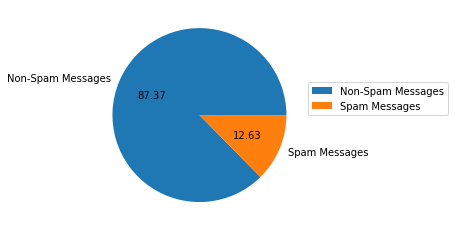

In [16]:
# Displaying the number of spam and non-spam messages in the data set in the form of Pie Chart
plt.pie(spam_data['isSpam'].value_counts(), labels=['Non-Spam Messages', 'Spam Messages'], autopct="%0.2f")
plt.legend(loc=(1,0.5))
plt.show()

### We can clearly see that the Data is imbalanced i.e. it contains more amount of non-spam messages than spam messages

In [17]:
# Importing the Natural Language Toolkit library
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANURAG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# Inserting the number of characters in the message in the dataset
spam_data.insert(2,'num_characters',spam_data['message_text'].apply(len),True)
spam_data

,isSpam,message_text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will �_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [20]:
# Inserting the number of words in the message in the dataset
spam_data.insert(3,'num_words',spam_data['message_text'].apply(lambda x:len(nltk.word_tokenize(x))),True)
spam_data

,isSpam,message_text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35
5568,0,Will �_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [21]:
# Inserting the number of sentences in the message in the dataset
spam_data.insert(4,'num_sentences',spam_data['message_text'].apply(lambda x:len(nltk.sent_tokenize(x))),True)
spam_data

,isSpam,message_text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will �_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [22]:
# Describing the Data
spam_data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# For non-spam messages
spam_data[spam_data['isSpam'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# For spam messages
spam_data[spam_data['isSpam'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


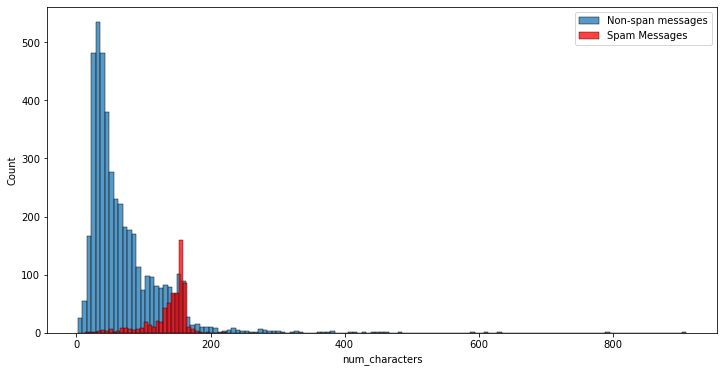

In [25]:
plt.figure(figsize = (12,6))
sns.histplot(spam_data[spam_data['isSpam'] == 0]['num_characters'])
sns.histplot(spam_data[spam_data['isSpam'] == 1]['num_characters'], color='red')
plt.legend(['Non-span messages','Spam Messages'])
plt.show()

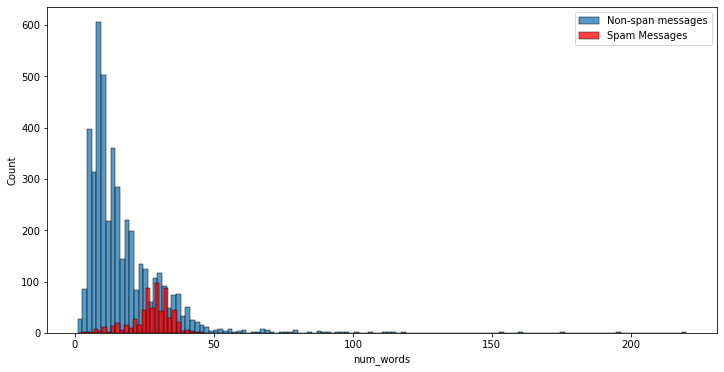

In [26]:
plt.figure(figsize = (12,6))
sns.histplot(spam_data[spam_data['isSpam'] == 0]['num_words'])
sns.histplot(spam_data[spam_data['isSpam'] == 1]['num_words'], color='red')
plt.legend(['Non-span messages','Spam Messages'])
plt.show()

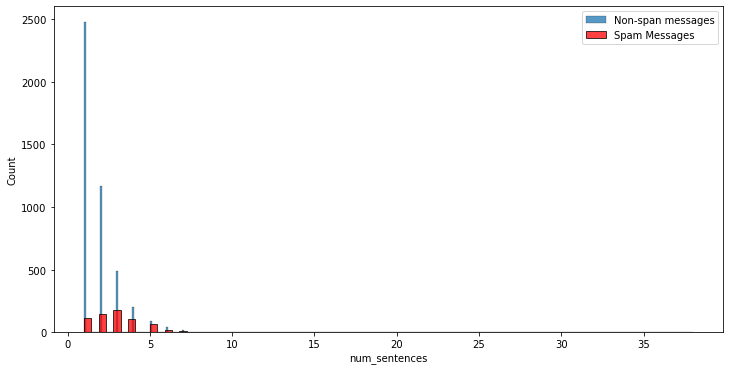

In [27]:
plt.figure(figsize = (12,6))
sns.histplot(spam_data[spam_data['isSpam'] == 0]['num_sentences'])
sns.histplot(spam_data[spam_data['isSpam'] == 1]['num_sentences'], color='red')
plt.legend(['Non-span messages','Spam Messages'])
plt.show()

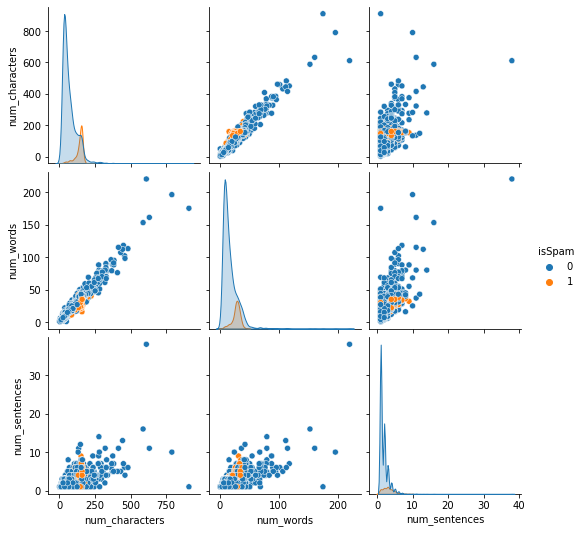

In [28]:
sns.pairplot(spam_data,hue='isSpam')
plt.show()

In [29]:
spam_data.corr()

,isSpam,num_characters,num_words,num_sentences
isSpam,1.000000,0.382785,0.263143,0.269132
num_characters,0.382785,1.000000,0.966087,0.626197
num_words,0.263143,0.966087,1.000000,0.680924
num_sentences,0.269132,0.626197,0.680924,1.000000


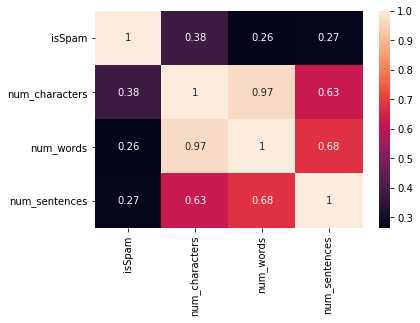

In [30]:
sns.heatmap(spam_data.corr(), annot=True)
plt.show()

## 3. Data Preprocessing

We Preprocess the data to make it more easier for the machine to understand
- Lower Case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANURAG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [34]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [35]:
transform_text("Hi are you Anurag?")

'hi anurag'

In [36]:
spam_data.insert(5,'transformed_text',spam_data['message_text'].apply(transform_text),True)
spam_data

,isSpam,message_text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will �_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [37]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [38]:
from wordcloud import WordCloud
wc = WordCloud(width = 1500, height = 1500, min_font_size = 8, background_color = 'white')

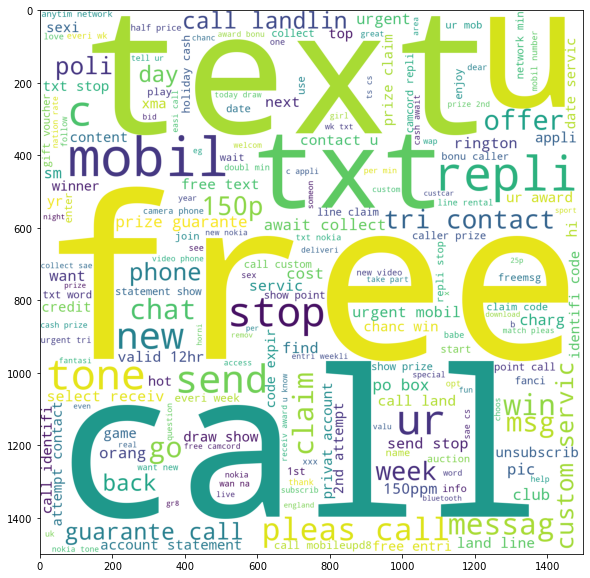

In [39]:
plt.figure(figsize = (15,10))
spam_wc = wc.generate(spam_data[spam_data['isSpam'] == 1]['transformed_text'].str.cat(sep = " "))
plt.imshow(spam_wc)

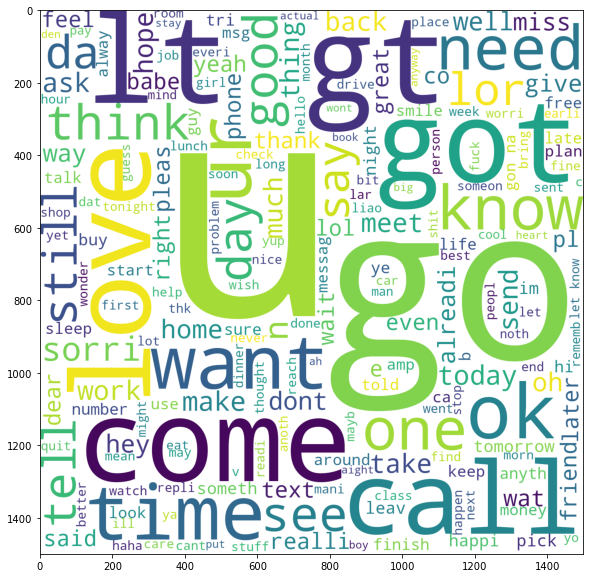

In [40]:
plt.figure(figsize = (15,10))
nonSpam_wc = wc.generate(spam_data[spam_data['isSpam'] == 0]['transformed_text'].str.cat(sep = " "))
plt.imshow(nonSpam_wc)

In [41]:
spam_data.head()

,isSpam,message_text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
spam_words = []
for msg in spam_data[spam_data['isSpam'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_words.append(word)

In [43]:
len(spam_words)

9941

In [44]:
from collections import Counter
Counter(spam_words).most_common(100)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35),
 ('show', 33),
 ('today', 33),
 ('offer', 33),
 ('line', 33),
 ('go', 32),
 ('receiv', 31),
 ('want', 31),
 ('latest', 30),
 ('rington', 30),
 ('landlin', 30),
 ('150ppm', 29),
 ('video', 29),
 ('1', 28),
 ('voucher', 28),
 ('code', 27),
 ('holiday', 27),
 ('rate', 26),
 ('network', 26),
 ('select', 26),
 ('150p', 26),
 ('date', 26),
 ('box', 26),
 ('day', 26),
 ('everi', 26),
 ('app

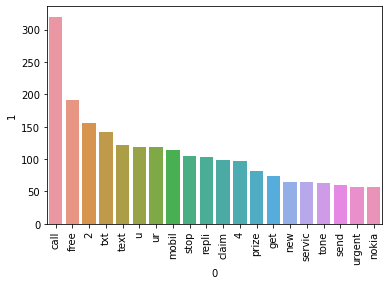

In [45]:
sns.barplot(x=pd.DataFrame(Counter(spam_words).most_common(20))[0], y=pd.DataFrame(Counter(spam_words).most_common(20))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [46]:
nonSpam_words = []
for msg in spam_data[spam_data['isSpam'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        nonSpam_words.append(word)

In [47]:
len(nonSpam_words)

35303

In [48]:
from collections import Counter
Counter(nonSpam_words).most_common(100)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('love', 216),
 ('ok', 215),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129),
 ('say', 127),
 ('back', 127),
 ('today', 123),
 ('hope', 122),
 ('ask', 121),
 ('sorri', 121),
 ('n', 120),
 ('send', 120),
 ('r', 120),
 ('work', 118),
 ('dont', 118),
 ('meet', 112),
 ('hi', 111),
 ('well', 109),
 ('thing', 109),
 ('wat', 108),
 ('k', 107),
 ('much', 107),
 ('night', 107),
 ('oh', 106),
 ('miss', 106),
 ('happi', 104),
 ('give', 102),
 ('later', 100),
 ('hey', 100),
 ('great', 97),
 ('na', 96),
 ('wait', 96),
 ('way', 95),
 ('alreadi', 90),
 ('thank', 87),
 ('let', 86),
 ('yeah', 86),
 ('text', 85),
 ('feel', 83),
 ('re

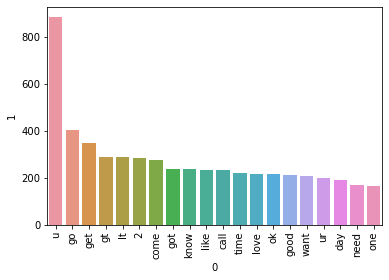

In [49]:
sns.barplot(x=pd.DataFrame(Counter(nonSpam_words).most_common(20))[0], y=pd.DataFrame(Counter(nonSpam_words).most_common(20))[1])
plt.xticks(rotation = 'vertical')
plt.show()

## 4. Model Building

Naive Bayes gives best results with textual data, and hence we are using naive bayes classifier but the values excepted are numeric.

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

it can be noted that term frequency–inverse document frequency(tfidf) best suites our rquirement and also gives better results

In [54]:
X = tfidf.fit_transform(spam_data['transformed_text']).toarray()

In [55]:
X.shape

(5169, 3000)

In [56]:
Y = spam_data['isSpam'].values

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [59]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [60]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [61]:
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [62]:
bnb.fit(X_train,Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


it 

In [92]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))